In [18]:
# import libraries
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

In [19]:
# retrieve 'Bitcoin vs USD' exchange rates with 1 hour interval and save the Dataframe to a variable
BTC_USD = yf.download("BTC-USD", start='2023-01-01',
                      end='2023-12-31', interval='1d')

# retrieve 'Bitcoin vs USD' exchange rates with 1 hour interval and save the Dataframe to a variable
BTC_USD = yf.download("BTC-USD", start='2023-01-01',
                      end='2023-12-31', interval='1d')

# check the data we retrieve
BTC_USD.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,16547.914062,16630.439453,16521.234375,16625.080078,16625.080078,9244361700
2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227
2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207
2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322
2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566


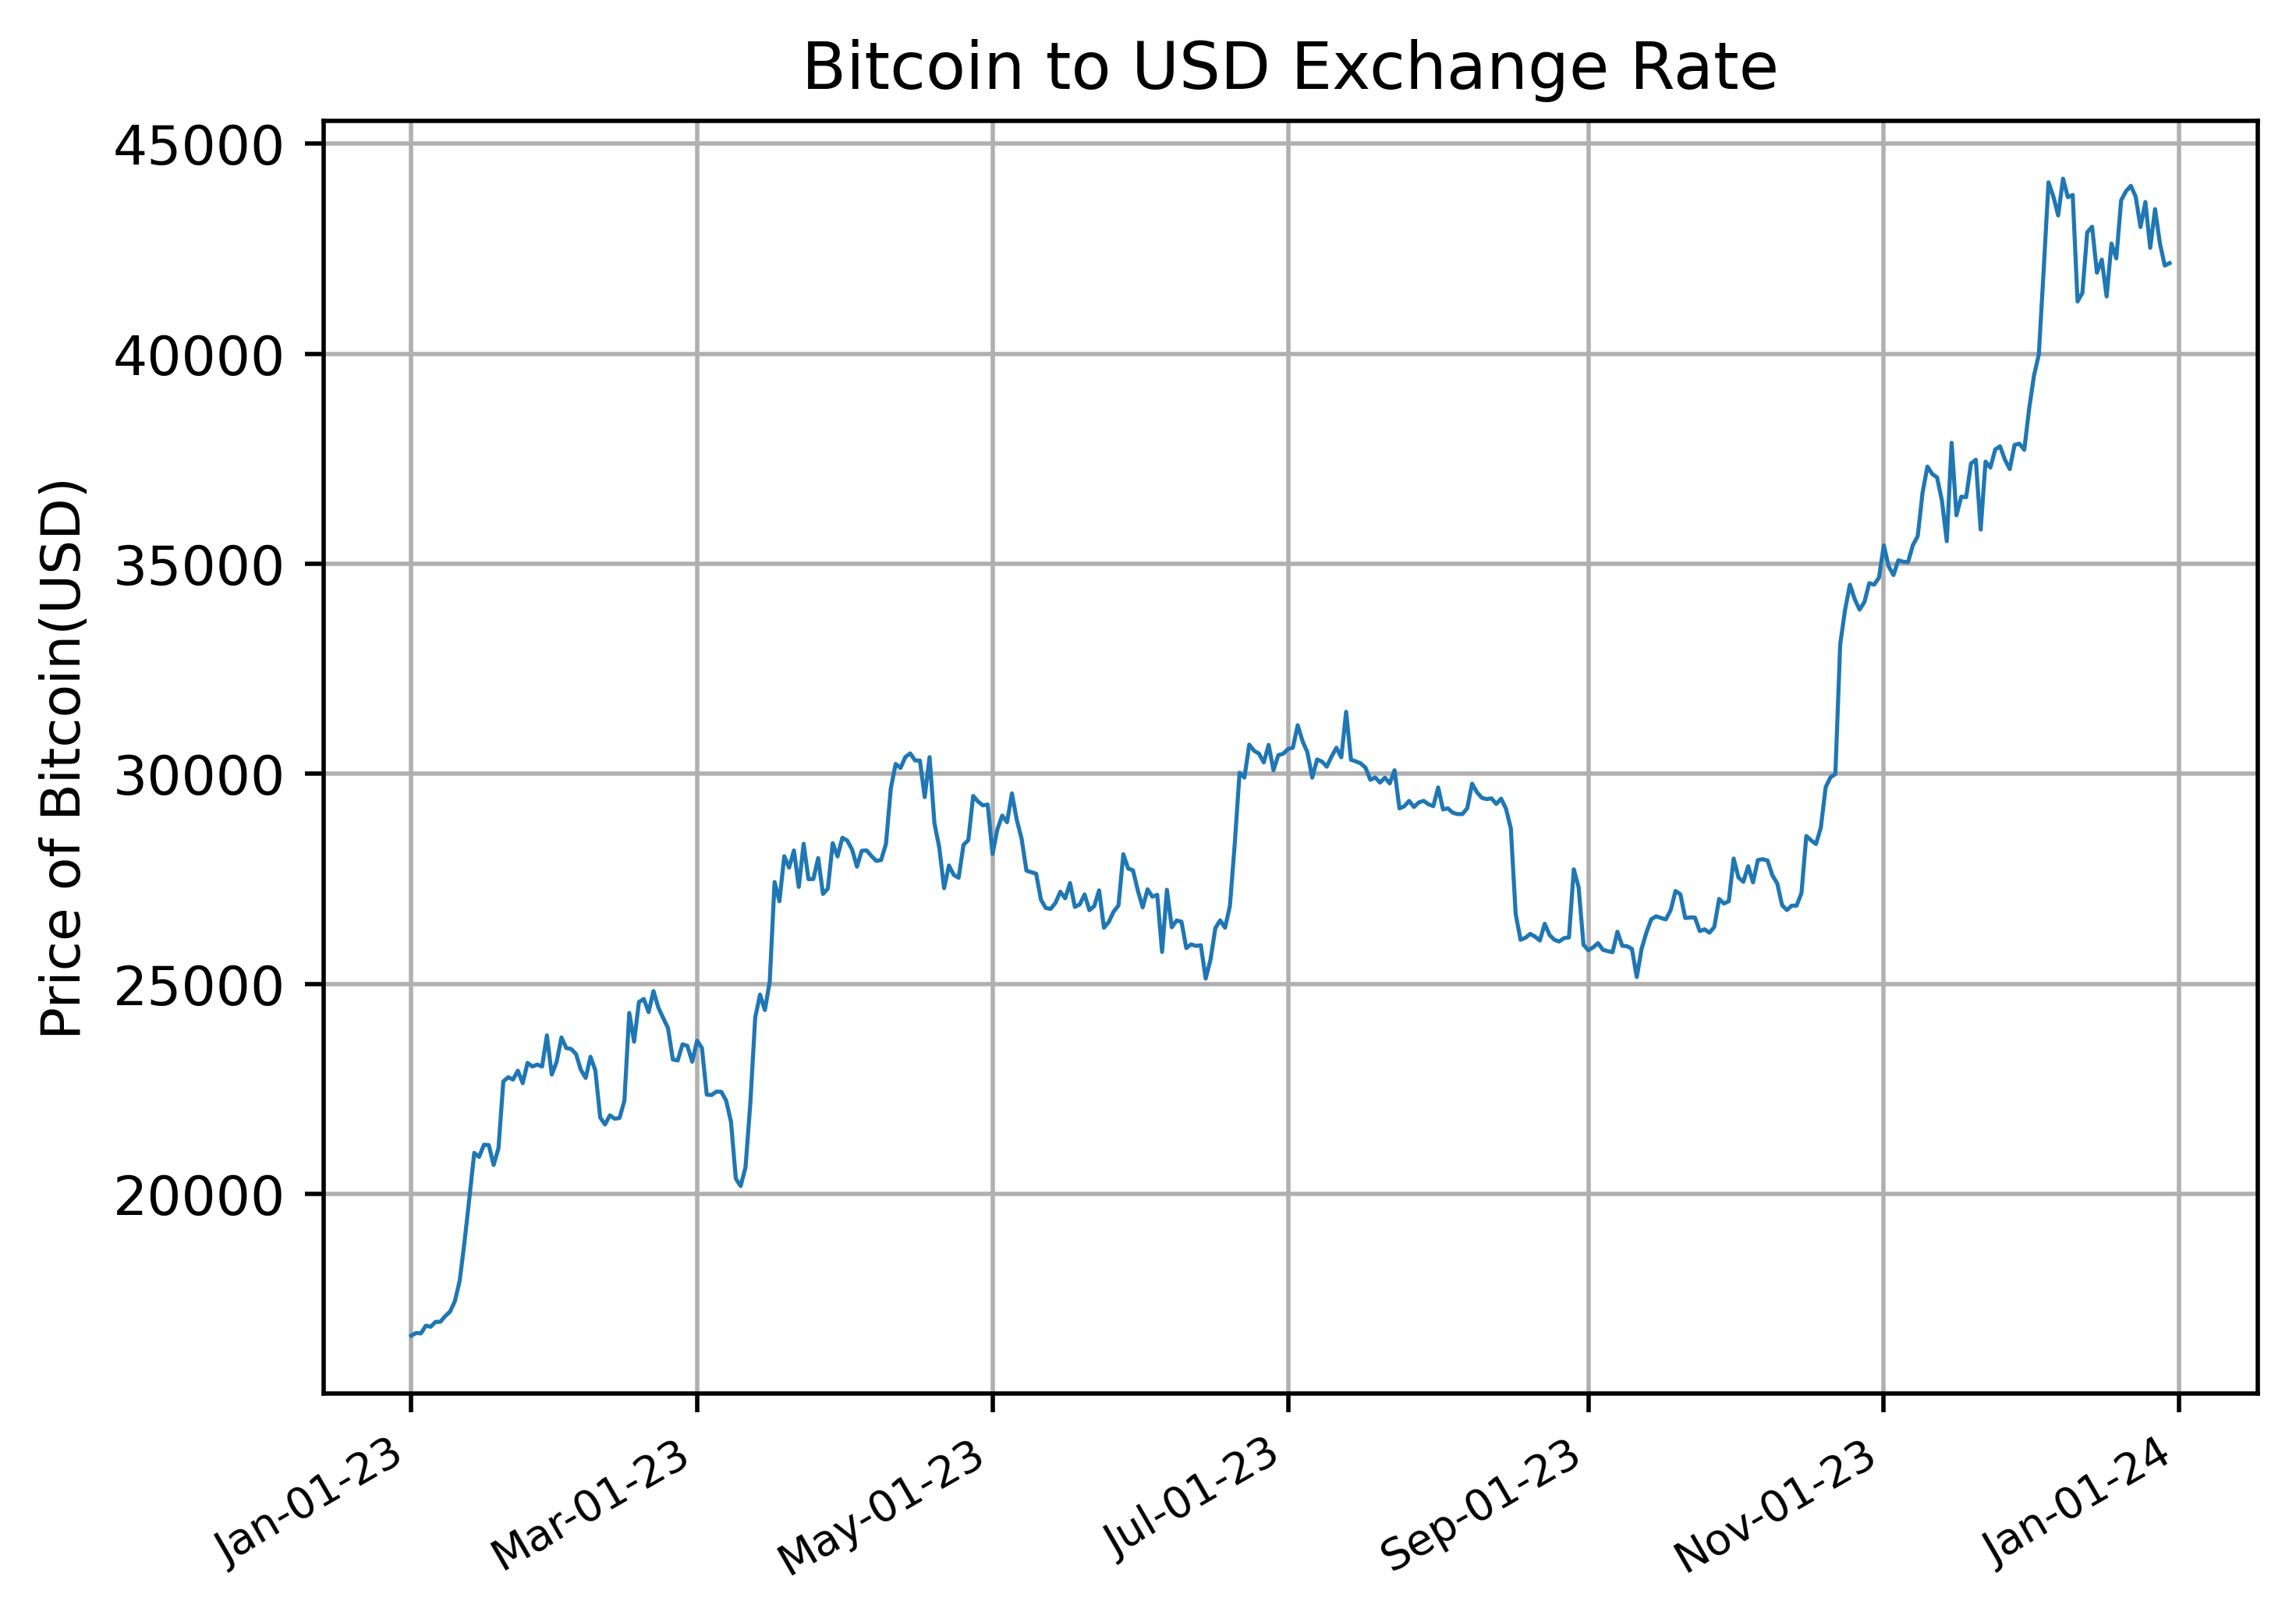

In [20]:
# Create a Price Chart
fig, ax = plt.subplots(dpi=500)

# formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# plotting the closing proce against the date(1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75)

# adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin(USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid()

# display the price chart
plt.show()

In [21]:
# compute a 9-day Simple Moving Average
BTC_USD['SMA_9'] = BTC_USD['Close'].rolling(window=9, min_periods=1).mean()

# compute a 30-day Simple Moving Average
BTC_USD['SMA_30'] = BTC_USD['Close'].rolling(window=30, min_periods=1).mean()

# display the last five entries of the DataFrame
BTC_USD.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_30
Date,,,,,,,,
2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982,43255.841580,41900.599609
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,43346.876736,42106.889193
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,43386.579861,42266.781510
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,43214.041233,42408.145182
2023-12-30,42091.753906,42584.125000,41556.226562,42156.902344,42156.902344,16013925945,43023.791233,42556.283724


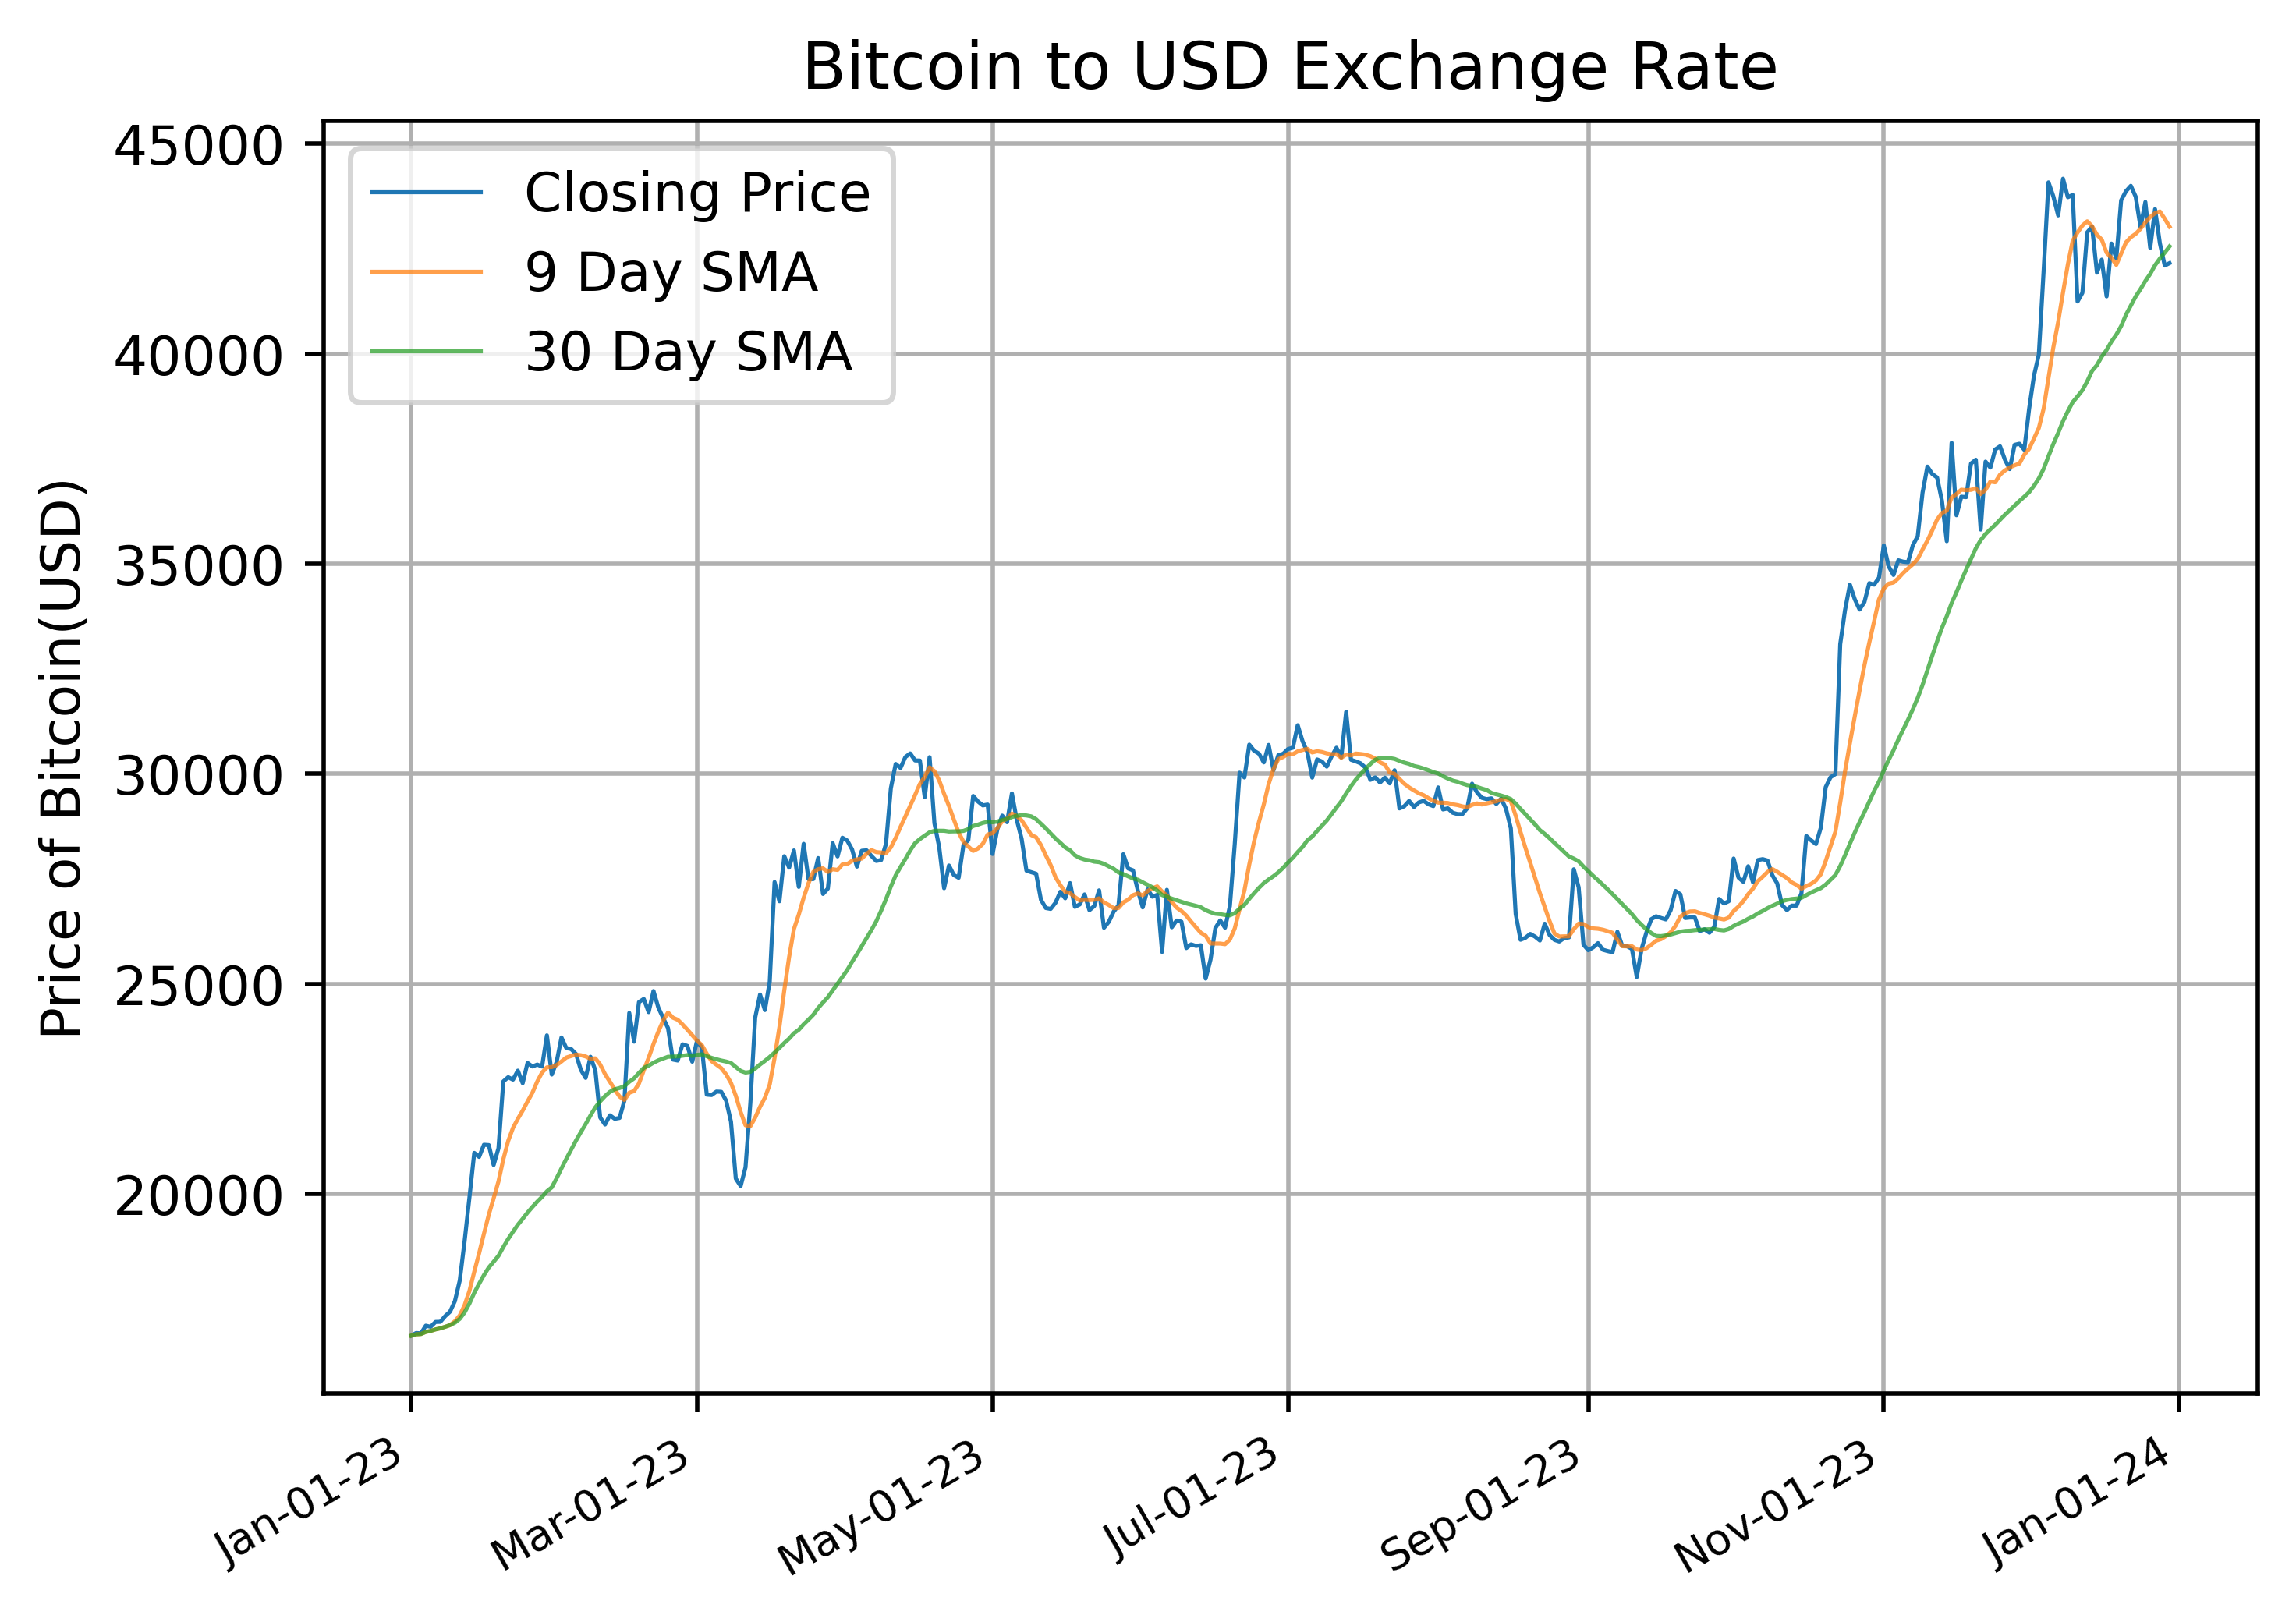

In [22]:
# Plot the Simple Moving Average
fig, ax = plt.subplots(dpi=500)

# formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)

fig.autofmt_xdate()

# plotting the closing proce against the date(1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price')
ax.plot(BTC_USD['SMA_9'], lw=0.75, alpha=0.75, label='9 Day SMA')
ax.plot(BTC_USD['SMA_30'], lw=0.75, alpha=0.75, label='30 Day SMA')

# add labels and title to the plot
ax.set_ylabel('Price of Bitcoin(USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid()
ax.legend()

# display the price chart
plt.show()

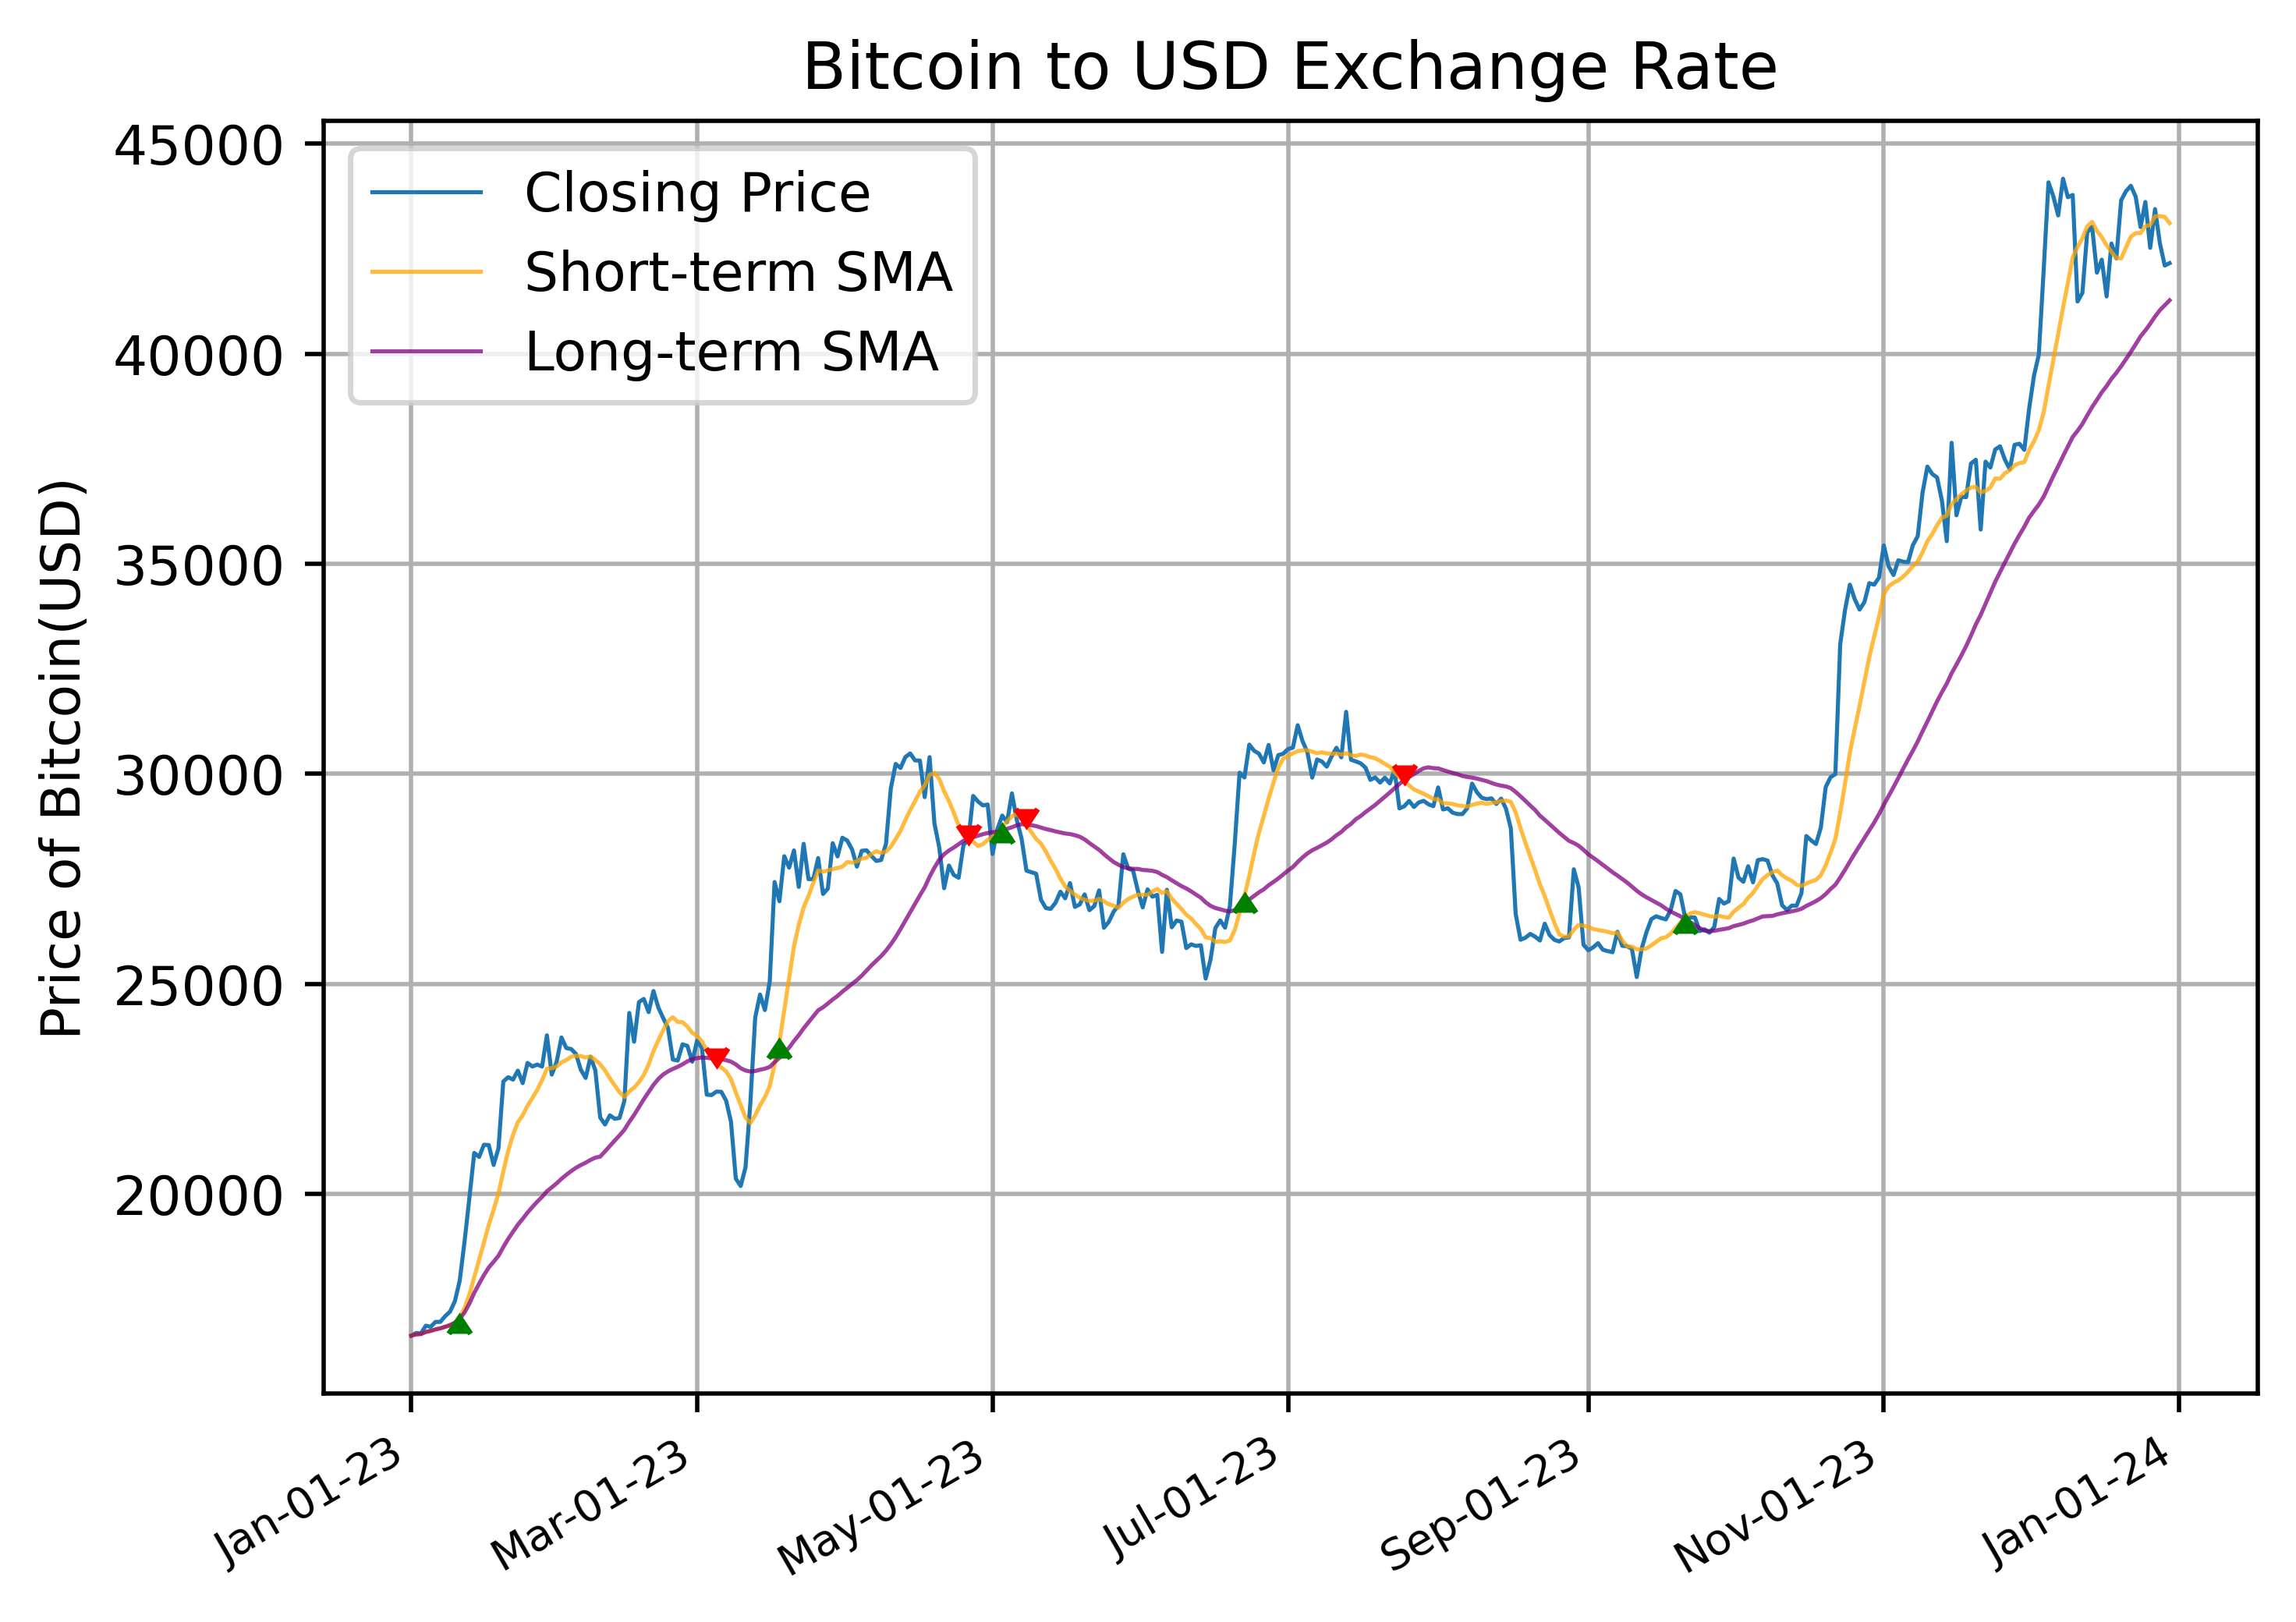

In [23]:
# Moving Average Crossover
# create a pandas dataframe same size as the BTC_USD dataframe
trade_signals = pd.DataFrame(index=BTC_USD.index)

# define the intervals for the fast anf SMA (in days)
short_interval = 10
long_intervals = 40

# compute the SMA and add it to the Dataframe
trade_signals['Short'] = BTC_USD['Close'].rolling(
    window=short_interval, min_periods=1).mean()
trade_signals['Long'] = BTC_USD['Close'].rolling(
    window=long_intervals, min_periods=1).mean()

# create a new column populated with zeros
trade_signals['Signal'] = 0.0

# wherever the shorter term SMA is above the longer term SMA,set the Signal column to 1, otherwise 0
trade_signals['Signal'] = np.where(
    trade_signals['Short'] > trade_signals['Long'], 1.0, 0.0)

# create the Positions column to buy/sell orders
trade_signals['Positions'] = trade_signals['Signal'].diff()

# visualize the algorithm trade
fig, ax = plt.subplots(dpi=500)

# format the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# plot the bitcoin closing price (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price')

# plot the short-term moving average
ax.plot(trade_signals['Short'], lw=0.75, alpha=0.75,
        color='orange', label='Short-term SMA')

# plot the long-term moving average
ax.plot(trade_signals['Long'], lw=0.75, alpha=0.75,
        color='purple', label='Long-term SMA')

# adding green arrows to indicate buy orders
ax.plot(trade_signals.loc[trade_signals['Positions'] == 1.0].index,
        trade_signals.Short[trade_signals['Positions'] == 1.0], marker=6, ms=4, linestyle='none', color='green')

# adding red arrows to indicate sell orders
ax.plot(trade_signals.loc[trade_signals['Positions'] == -1.0].index,
        trade_signals.Short[trade_signals['Positions'] == -1.0], marker=7, ms=4, linestyle='none', color='red')

# add labels and title
ax.set_ylabel('Price of Bitcoin(USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid()
ax.legend()

# display the price chart
plt.show()

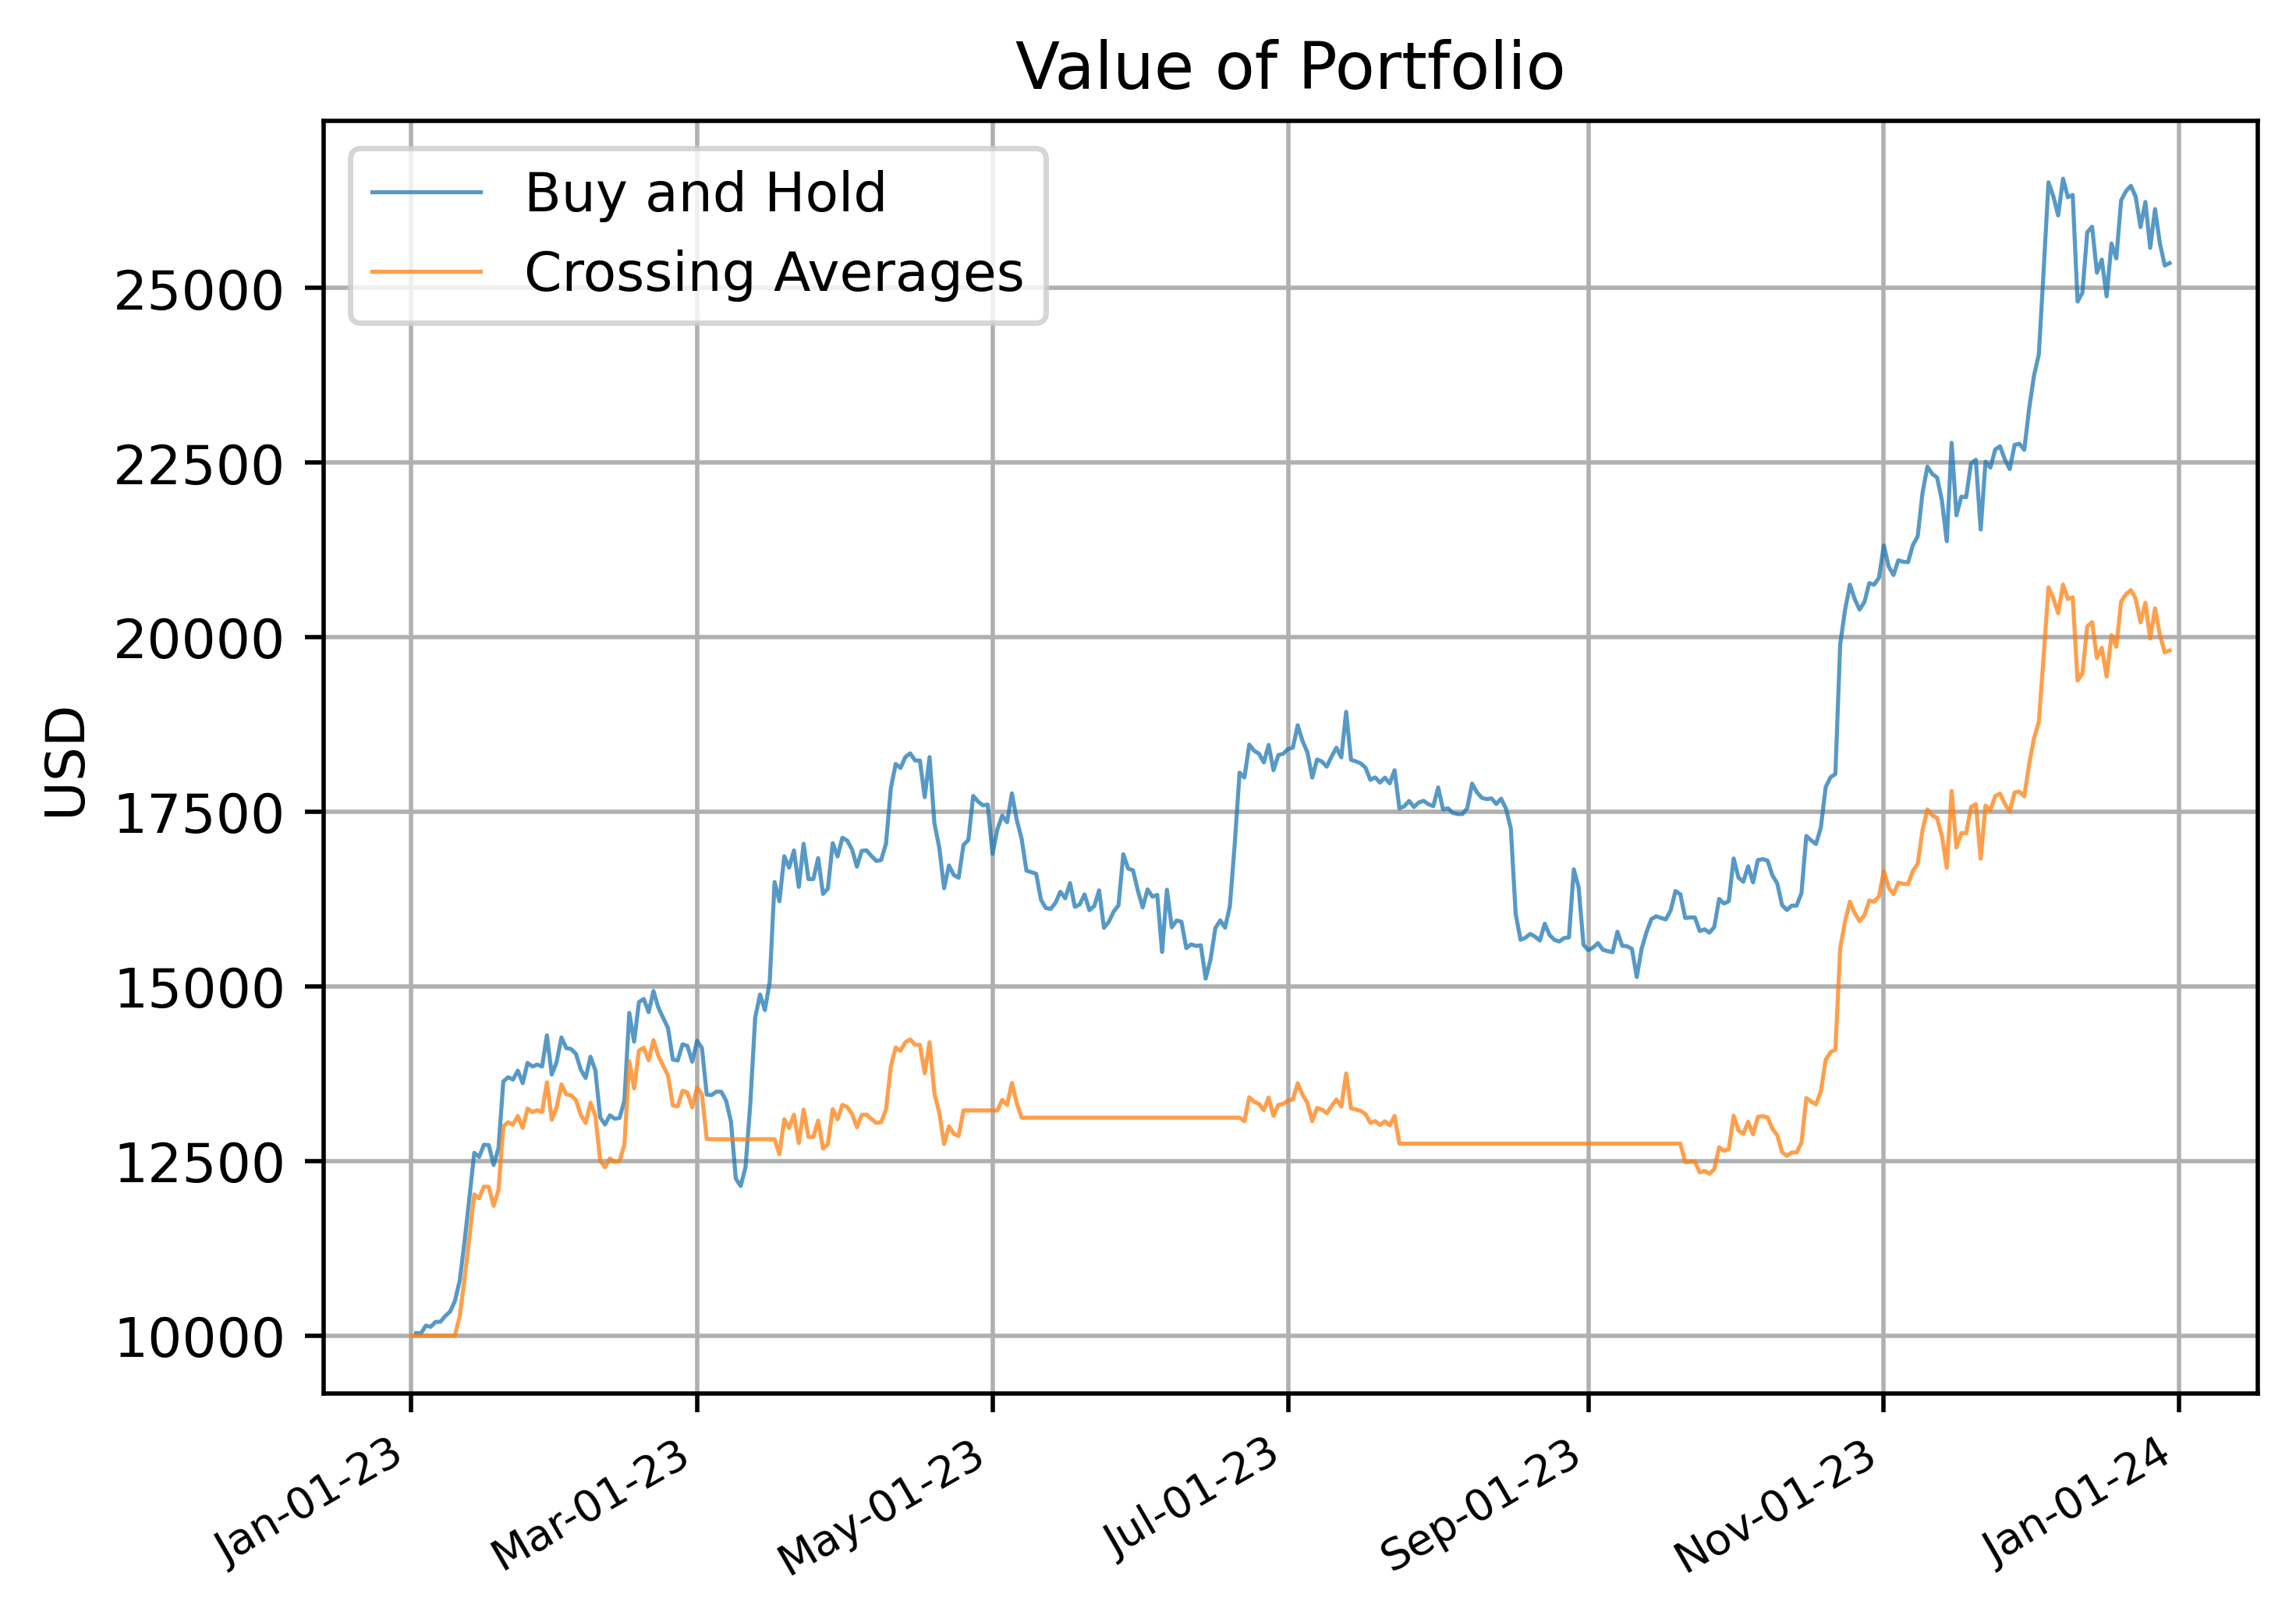

In [24]:

# Backtest the Algorithm
# define how much money you will start with (in USD)
initial_balance = 10000.0

# create a Dataframe containing all the dates considered
backtest = pd.DataFrame(index=trade_signals.index)

# add a column containing the daily percent returns of Bitcoin
backtest['BTC_Return'] = BTC_USD['Close'] / BTC_USD['Close'].shift(1)

# add a column containing the daily percent return of the Moving Average Crossover strategy
backtest['Alg_Return'] = np.where(
    trade_signals.Signal == 1, backtest.BTC_Return, 1.0)

# add a column containing the daily value of the portfolio using the Crossover strategy
backtest['Balance'] = initial_balance * backtest.Alg_Return.cumprod()

# make a plot to compare the performance of trading alghorithm implemented anf a simple "Buy and Hold" strategy
fig, ax = plt.subplots(dpi=500)

# Format the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# plot the value of Buy and Hold strategy
ax.plot(initial_balance*backtest.BTC_Return.cumprod(),
        lw=0.75, alpha=0.75, label='Buy and Hold')

# plot total value of Crossing Average Strategy
ax.plot(backtest['Balance'], lw=0.75, alpha=0.75, label='Crossing Averages')

# add labels and title
ax.set_ylabel('USD')
ax.set_title('Value of Portfolio')
ax.grid()
ax.legend()

# display the price chart
plt.show()